# Dual Plane Analysis

### Notebook for processing and analyzing dual plane somatic and dendritic recordings

In [1]:
import os
import numpy as np
from Lab_Analyses.Spine_Analysis.preprocess_dual_plane_data import organize_dual_plane_soma_dend_data
from Lab_Analyses.Spine_Analysis.analyze_dual_plane_data import analyze_dual_plane_data
from Lab_Analyses.Utilities.save_load_pickle import load_pickle, save_pickle
%matplotlib notebook

### Datasets
Specify which mice to be analyzed

In [2]:
# Mouse ids
id_1 = "JW129"
id_2 = "JW130"

mouse_list = [id_1, id_2]


### Preprocessing
Preprocess the dual plane data

In [3]:
# Reprocess?
reprocess = False

# Inputs
data_dir = "two_plane"
file_types = {"Dendrite": "dendrite", "Soma": "soma"}

# Preprocess data
if reprocess:
    for mouse in mouse_list:
        organize_dual_plane_soma_dend_data(mouse_id=mouse, data_dir=data_dir, file_types=file_types, save=False)

### Analyze dual plane data

In [7]:
# Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
dual_plane_dir = "Dual_Plane"
dual_plane_path = os.path.join(group_path, experiment_dir, dual_plane_dir)

# Analyze
reanalyze = True
if reanalyze:
    dual_plane_data = analyze_dual_plane_data(mouse_list, save=False, save_path=dual_plane_path)
else:
    dual_plane_data = load_pickle(["dual_plane_soma_dendrite_activity_data"], path=dual_plane_path)

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:168: RuntimeWarning: Mean of empty slice
  m = np.nanmean(value, axis=1)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\core\_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


### Visualize Data

In [8]:
# Set up figure save path
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
fig_path = os.path.join(initial_path, experiment_dir, dual_plane_dir)
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)

<IPython.core.display.Javascript object>


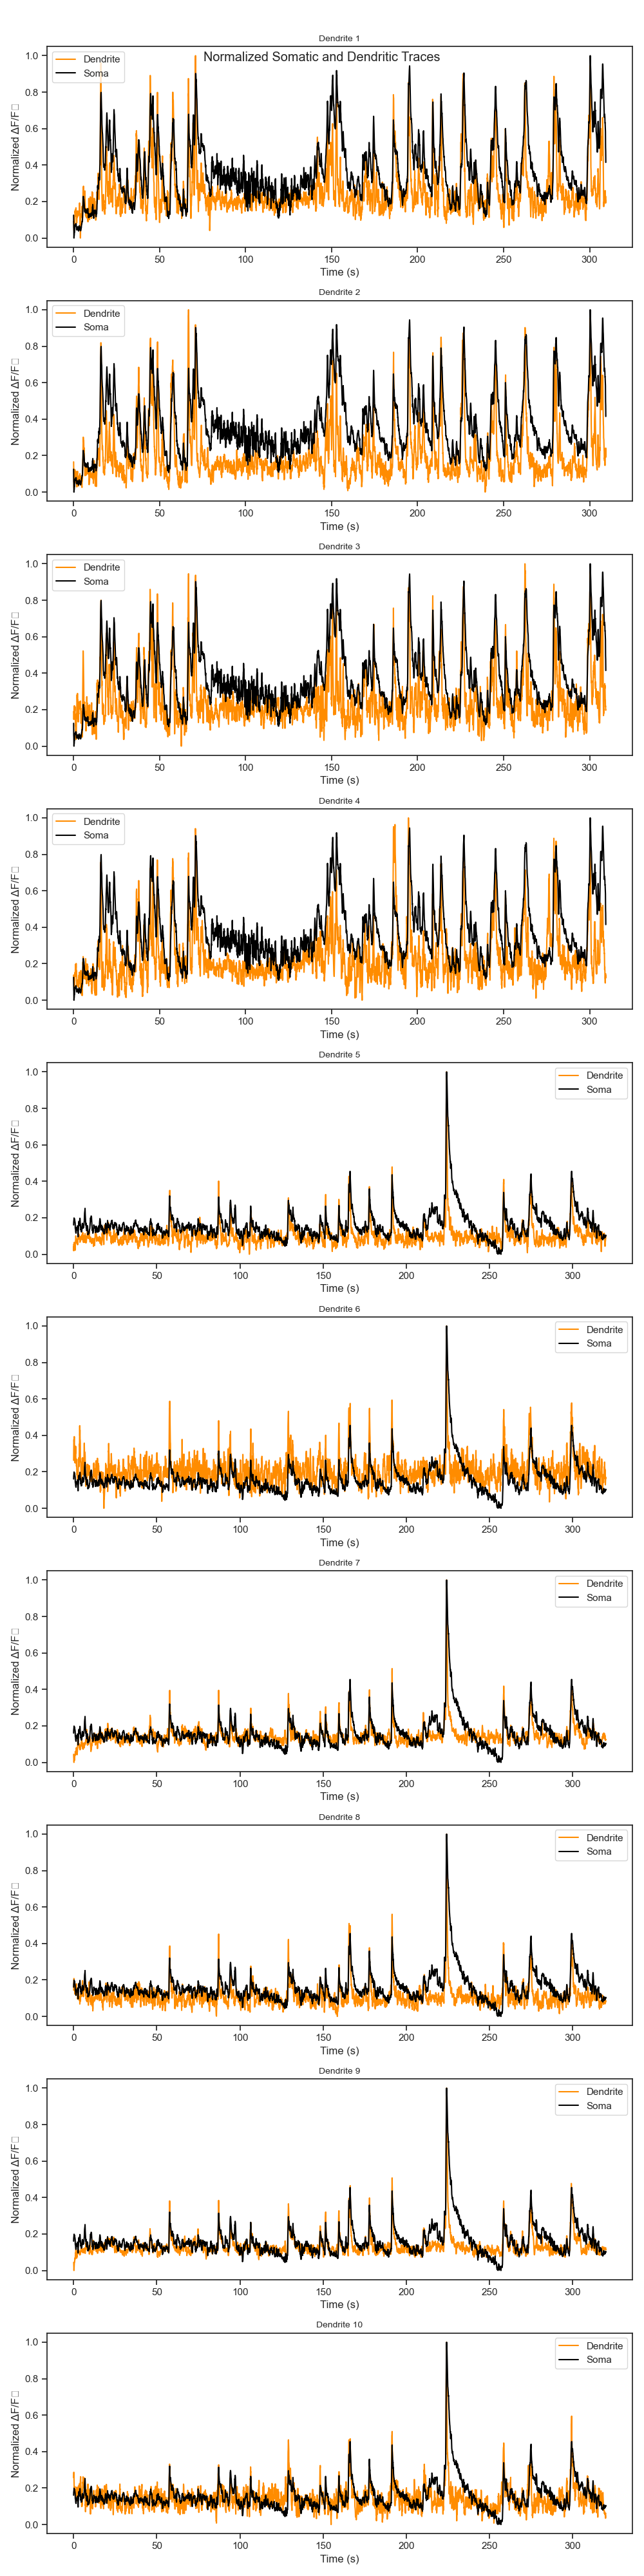

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:109: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


In [13]:
# Plot soma and dendrite traces
dual_plane_data.plot_soma_dend_traces(norm=True, plot_binary=False, subselect=None, save=True, save_path=fig_path)

<IPython.core.display.Javascript object>


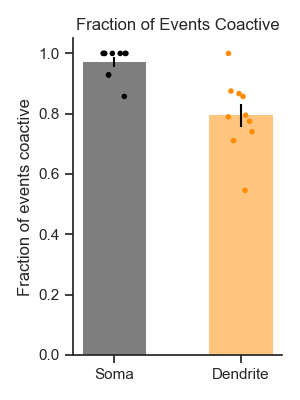

In [15]:
# Plot fraction of events coactive
dual_plane_data.plot_fraction_coactive(mean_type="mean", err_type="sem", save=True, save_path=fig_path)

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis\analyze_dual_plane_data.py:989: RuntimeWarning: Mean of empty slice
  d_n_means.append(np.nanmean(dn, axis=1))
c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis\analyze_dual_plane_data.py:991: RuntimeWarning: Mean of empty slice
  s_n_means.append(np.nanmean(sn, axis=1))


<IPython.core.display.Javascript object>


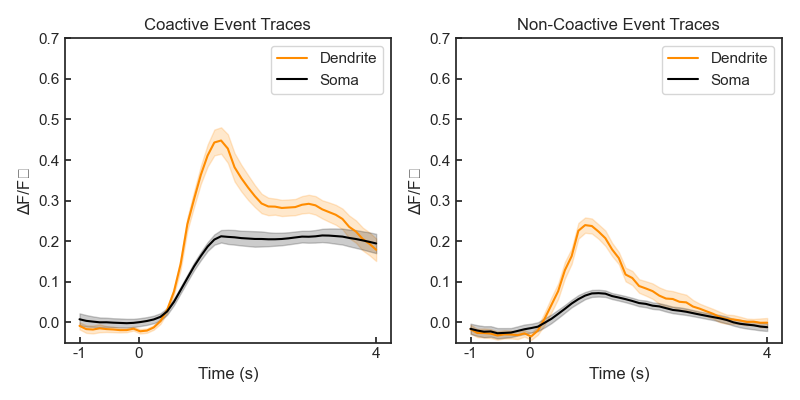

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:109: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


In [24]:
# Plot traces that are coactive and those that are not
dual_plane_data.plot_coactive_noncoactive_traces(norm=False, avg_type="Dend", save=True, save_path=fig_path)

<IPython.core.display.Javascript object>


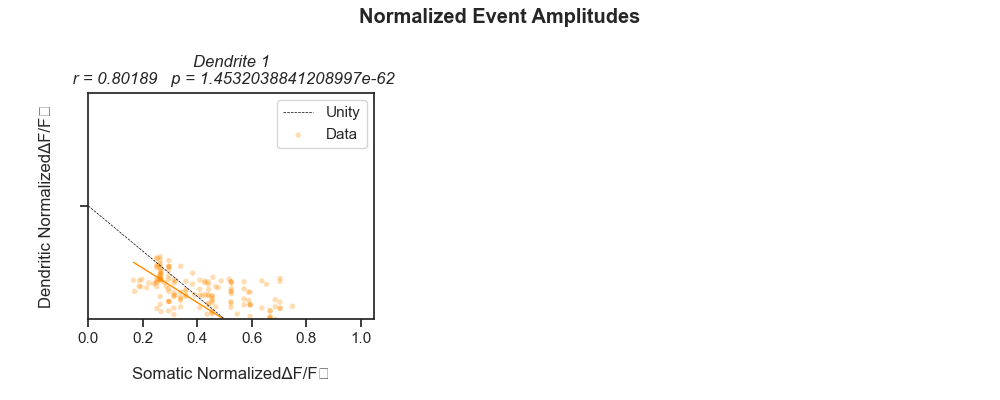

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:109: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


In [25]:
# Plot correlations between soma and dendrites

## Select data type to plot (amplitude, amplitude_norm, tau, tau_norm)
data_type = "amplitude_norm"

## Plot
dual_plane_data.plot_between_correlations(data_type=data_type, individual=False, save=True, save_path=fig_path)

<IPython.core.display.Javascript object>


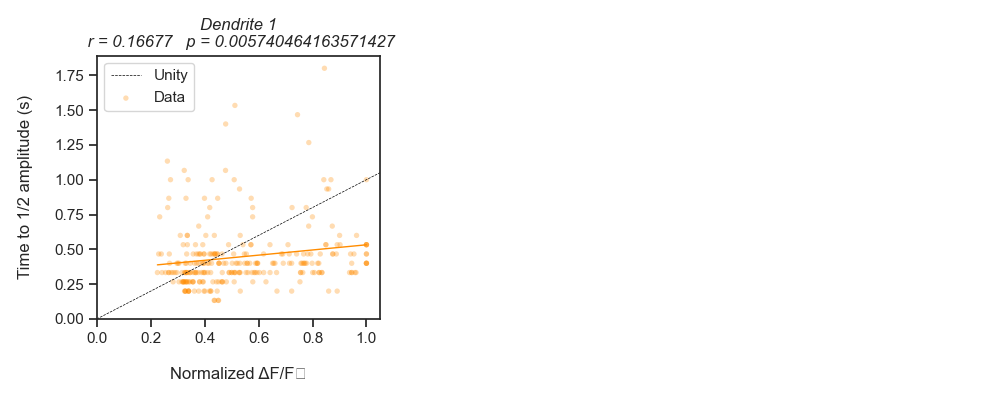

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)


In [18]:
# Plot correlations between variables within same roi type

## Select group type to plot (Soma, Dendrite)
group_type = "Dendrite"

## Plot
dual_plane_data.plot_within_correlations(group_type=group_type, norm=True, individual=False, save=False, save_path=fig_path)

In [ ]:
import seaborn as sns

In [ ]:
colors = sns.color_palette("Blues", as_cmap=True, n_colors=10)

In [ ]:
import matplotlib.colors as mcolors
new_colors = [mcolors.rgb2hex(colors(i)) for i in range(colors.N)]
num = np.floor(len(new_colors) / 10)
counts = np.linspace(start=50, stop=len(new_colors), num=10).astype(int)
counts

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
for i in counts:
    plt.axhline(i, color=new_colors[i])

In [ ]:
b

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
a = np.array([4,5,6,7,4,5,6,10, 3])

In [48]:
np.sum(a < 5) / len(a)

0.3333333333333333